In [4]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
treatments_CO26990 = {
    'A': 'Saline WT',
    'B': 'Saline TG',
    'C': 'Amiloride TG',
}

treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}

In [6]:
def read_data(fpath, g2c):
    data = pd.read_excel(fpath, sheet_name='Y-Maze')
    data['Condition'] = pd.Categorical(data.Group.apply(lambda x: g2c[x]), categories=list(g2c.values()), ordered=True)
    return(data)

data_CO26990 = read_data('../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx', treatments_CO26990)
data_CO26990

,Cohort,Group,Sex,IRN,Distance m,Correct Entries n,Correct Entries %,Entries n,Remarks,Condition
0,I,A,f,12913 A,18.34840,12,33.333333,36,-,Saline WT
1,I,A,f,12915 A,17.52170,18,54.545455,33,-,Saline WT
2,II,A,f,12937 A,15.50840,12,60.000000,20,-,Saline WT
3,II,A,f,12955 A,13.96700,7,43.750000,16,-,Saline WT
4,II,A,f,12957 A,14.34980,12,63.157895,19,-,Saline WT
5,II,A,f,12961 A,16.53460,16,69.565217,23,-,Saline WT
6,II,A,f,12967 A,15.88770,11,61.111111,18,-,Saline WT
7,II,A,f,12979 A,17.08600,10,40.000000,25,-,Saline WT
8,I,A,m,14138,16.74750,15,60.000000,25,-,Saline WT
9,I,A,m,14142,9.65409,8,66.666667,12,-,Saline WT


In [7]:
data_CO28152 = read_data('../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx', treatments_CO28152)
data_CO28152

,Cohort,Group,Sex,IRN,"Total entries, week 12","Total entries, week 13","Correct entries %, week 12","Correct entries %, week 13",Condition
0,I,A,f,15117,9,32,33.333333,56.250000,Amiloride TG
1,I,A,f,15119,46,52,63.043478,42.307692,Amiloride TG
2,I,A,f,15121,13,39,69.230769,33.333333,Amiloride TG
3,I,A,f,14627 A,14,21,64.285714,57.142857,Amiloride TG
4,I,A,f,14687 A,36,35,52.777778,51.428571,Amiloride TG
...,...,...,...,...,...,...,...,...,...
140,V,J,m,16182,16,32,62.500000,40.625000,DMSO WT
141,V,J,m,16192,37,27,48.648649,66.666667,DMSO WT
142,VI,J,m,16220,23,20,69.565217,45.000000,DMSO WT
143,VI,J,m,16226,15,17,60.000000,41.176471,DMSO WT


In [8]:
data_CO28154 = read_data('../../resources/QPS/5xFAD-mouse/CO28154-behavioral-data-cleaned.xlsx', treatments_CO28154)
data_CO28154

,Cohort,Group,Sex,IRN,"Total entries, week 12","Total entries, week 13","Correct entries %, week 12","Correct entries %, week 13",Condition
0,II,A,f,15721,26,34.0,11.538462,50.000000,Saline TG
1,II,A,f,15725,45,41.0,42.222222,63.414634,Saline TG
2,V,A,f,15891,16,17.0,25.000000,64.705882,Saline TG
3,V,A,f,15893,20,21.0,55.000000,47.619048,Saline TG
4,V,A,f,15911,20,14.0,50.000000,71.428571,Saline TG
...,...,...,...,...,...,...,...,...,...
158,III,L,m,16774,37,25.0,48.648649,52.000000,Vehicle (Arundine) WT
159,III,L,m,16784,36,30.0,50.000000,40.000000,Vehicle (Arundine) WT
160,IV,L,m,16802,32,17.0,62.500000,70.588235,Vehicle (Arundine) WT
161,VI,L,m,17020,21,16.0,71.428571,62.500000,Vehicle (Arundine) WT


In [9]:
def my_boxplot(data, x='Correct entries %, week 12'):
    ngroups = len(data.Group.unique())
    fig, ax = plt.subplots(figsize=(6.4, ngroups * 0.4))
    sns.boxplot(data, x=x, y='Condition', ax=ax)
    sns.stripplot(data, x=x, y='Condition', ax=ax, color='lightgray', edgecolor='gray', linewidth=1)
    return((fig, ax))

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_18116/3668789426.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data, x=x, y='Condition', ax=ax, color='lightgray', edgecolor='gray', linewidth=1)


['named-figure/pct-correct-entries-boxplot-CO26990.png',
 'named-figure/pct-correct-entries-boxplot-CO26990.pdf']

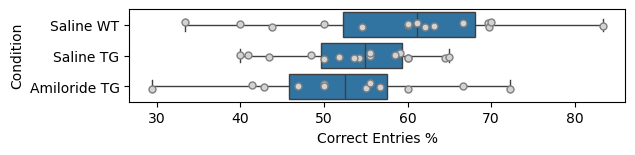

In [10]:
fig, ax = my_boxplot(data_CO26990, 'Correct Entries %')
attila_utils.savefig(fig, 'pct-correct-entries-boxplot-CO26990')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_18116/3668789426.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data, x=x, y='Condition', ax=ax, color='lightgray', edgecolor='gray', linewidth=1)


['named-figure/pct-correct-entries-w12-boxplot-CO28152.png',
 'named-figure/pct-correct-entries-w12-boxplot-CO28152.pdf']

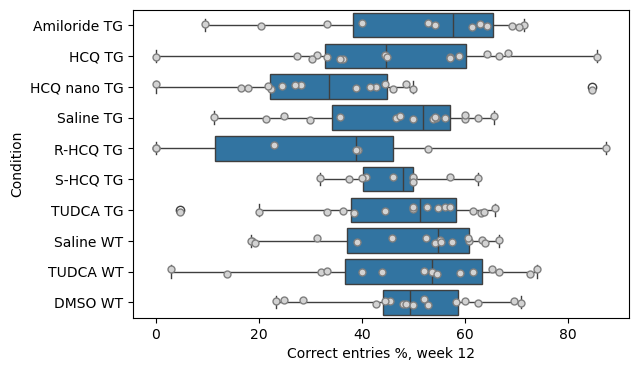

In [11]:
fig, ax = my_boxplot(data_CO28152, 'Correct entries %, week 12')
attila_utils.savefig(fig, 'pct-correct-entries-w12-boxplot-CO28152')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_18116/3668789426.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data, x=x, y='Condition', ax=ax, color='lightgray', edgecolor='gray', linewidth=1)


['named-figure/pct-correct-entries-w13-boxplot-CO28152.png',
 'named-figure/pct-correct-entries-w13-boxplot-CO28152.pdf']

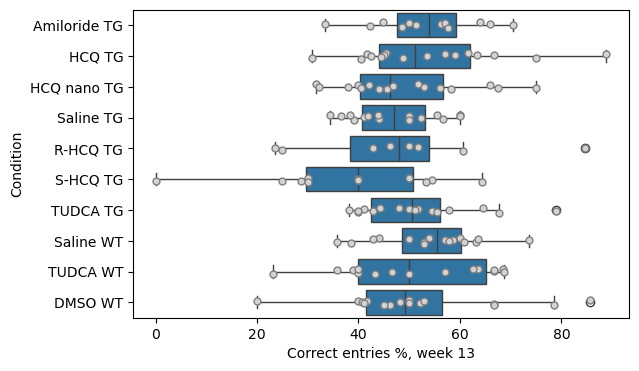

In [12]:
fig, ax = my_boxplot(data_CO28152, 'Correct entries %, week 13')
attila_utils.savefig(fig, 'pct-correct-entries-w13-boxplot-CO28152')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_18116/3668789426.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data, x=x, y='Condition', ax=ax, color='lightgray', edgecolor='gray', linewidth=1)


['named-figure/pct-correct-entries-w12-boxplot-CO28154.png',
 'named-figure/pct-correct-entries-w12-boxplot-CO28154.pdf']

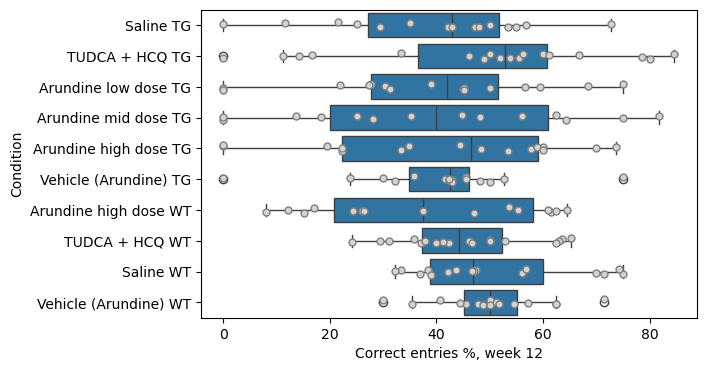

In [13]:
fig, ax = my_boxplot(data_CO28154, 'Correct entries %, week 12')
attila_utils.savefig(fig, 'pct-correct-entries-w12-boxplot-CO28154')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_18116/3668789426.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data, x=x, y='Condition', ax=ax, color='lightgray', edgecolor='gray', linewidth=1)


['named-figure/pct-correct-entries-w13-boxplot-CO28154.png',
 'named-figure/pct-correct-entries-w13-boxplot-CO28154.pdf']

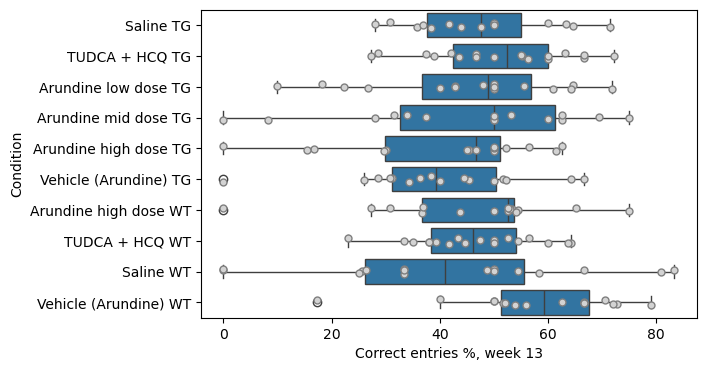

In [14]:
fig, ax = my_boxplot(data_CO28154, 'Correct entries %, week 13')
attila_utils.savefig(fig, 'pct-correct-entries-w13-boxplot-CO28154')

In [15]:
%connect_info

{
  "shell_port": 61263,
  "iopub_port": 61264,
  "stdin_port": 61265,
  "control_port": 61267,
  "hb_port": 61266,
  "ip": "127.0.0.1",
  "key": "2e7eb409-5539e8e5236460f29591a79d",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-02-29-Y-maze/2024-02-29-Y-maze.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a230d0cd-1753-4854-918f-a7fc1c543c4c.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
